In [1]:
import numpy as np
import seaborn as sns
import pandas as pd 
import scipy.stats
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv('/Users/gost1/Desktop/house-prices-advanced-regression-techniques/train.csv')

In [5]:
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## 10-fold кросс-валидацию

In [7]:
Y = data['SalePrice']

In [8]:
cols = list(data.select_dtypes([np.number]).columns)

In [9]:
X = data[cols]

In [10]:
X.drop(['SalePrice', 'LotFrontage', 'GarageYrBlt', 'MasVnrArea'], axis=1, inplace=True)

In [11]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 34 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Id             1460 non-null   int64
 1   MSSubClass     1460 non-null   int64
 2   LotArea        1460 non-null   int64
 3   OverallQual    1460 non-null   int64
 4   OverallCond    1460 non-null   int64
 5   YearBuilt      1460 non-null   int64
 6   YearRemodAdd   1460 non-null   int64
 7   BsmtFinSF1     1460 non-null   int64
 8   BsmtFinSF2     1460 non-null   int64
 9   BsmtUnfSF      1460 non-null   int64
 10  TotalBsmtSF    1460 non-null   int64
 11  1stFlrSF       1460 non-null   int64
 12  2ndFlrSF       1460 non-null   int64
 13  LowQualFinSF   1460 non-null   int64
 14  GrLivArea      1460 non-null   int64
 15  BsmtFullBath   1460 non-null   int64
 16  BsmtHalfBath   1460 non-null   int64
 17  FullBath       1460 non-null   int64
 18  HalfBath       1460 non-null   int64
 19  Bedroo

In [30]:
from sklearn.linear_model import LinearRegression

In [13]:
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.15, random_state = i)
    model = LinearRegression()
    model.fit(X_train, Y_train)
    print("{}: {}".format(i, model.score(X_test, Y_test)))

0: 0.7841400303450725
1: 0.8602138210595336
2: 0.8401621854811927
3: 0.3921246211294811
4: 0.8563413749420047
5: 0.8187375751152671
6: 0.7715794017736028
7: 0.8543863647003445
8: 0.8677844941412322
9: 0.8279788397400071


In [14]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)

scores = cross_val_score(model, X, Y, cv=kf)

scores.mean(), scores

(0.7937555284194202,
 array([0.84390289, 0.85497435, 0.88752303, 0.74951104, 0.81698014,
        0.82013355, 0.81554085, 0.81452472, 0.50115778, 0.83330693]))

## Cлучайный лес

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import auc, roc_curve, roc_auc_score
import seaborn as sns

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)
clf_rf = RandomForestClassifier(n_estimators=1000, max_depth=5, min_samples_leaf=20, max_features=0.5, n_jobs=-1)
clf_rf.fit(X_train, y_train)   

RandomForestClassifier(max_depth=5, max_features=0.5, min_samples_leaf=20,
                       n_estimators=1000, n_jobs=-1)

In [24]:
imp = pd.Series(clf_rf.feature_importances_)
imp.sort_values(ascending=False)

14    0.126794
2     0.079263
24    0.075240
5     0.074272
10    0.068462
11    0.059599
7     0.058635
6     0.049444
0     0.045802
9     0.041654
17    0.041079
3     0.040487
26    0.032617
12    0.032503
25    0.031074
32    0.022688
21    0.019824
4     0.015329
33    0.015326
23    0.013676
1     0.013490
8     0.009906
22    0.009696
27    0.005850
19    0.005321
29    0.004776
18    0.002432
20    0.001928
15    0.001749
16    0.000707
31    0.000377
13    0.000000
28    0.000000
30    0.000000
dtype: float64

## Cтекинг моделей

In [54]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import RidgeCV
from sklearn.neighbors import KNeighborsRegressor

In [66]:
Regressor = StackingRegressor(
    [
        ('RidgeCV', RidgeCV()),
        ('KNeighborsRegressor', KNeighborsRegressor()),
        ('DecisionTreeRegressor', DecisionTreeRegressor()),
        ('LinearRegression', LinearRegression())
    ], LinearRegression())

In [67]:
Regressor.fit(X_train, y_train)

StackingRegressor(estimators=[('RidgeCV',
                               RidgeCV(alphas=array([ 0.1,  1. , 10. ]))),
                              ('KNeighborsRegressor', KNeighborsRegressor()),
                              ('DecisionTreeRegressor',
                               DecisionTreeRegressor()),
                              ('LinearRegression', LinearRegression())],
                  final_estimator=LinearRegression())

In [68]:
print(f'Score on train data {Regressor.score(X_train, y_train)}')
print(f'Score on test data {Regressor.score(X_test, y_test)}')

for i in Regressor.named_estimators:
    print(f'Score on train data with model {i} {Regressor.named_estimators_[i].score(X_train, y_train)}')
    print(f'Score on test data with model {i} {Regressor.named_estimators_[i].score(X_test, y_test)}')


Score on train data 0.9575431012130402
Score on test data 0.8560149218014447
Score on train data with model RidgeCV 0.791354813115817
Score on test data with model RidgeCV 0.8338600049263343
Score on train data with model KNeighborsRegressor 0.7591138385657913
Score on test data with model KNeighborsRegressor 0.6589427050738647
Score on train data with model DecisionTreeRegressor 1.0
Score on test data with model DecisionTreeRegressor 0.7396649619979472
Score on train data with model LinearRegression 0.7914719036136905
Score on test data with model LinearRegression 0.8335532126701648


In [69]:
score_train = {}
score_test = {}

for i in Regressor.named_estimators:
    score_train[i] = Regressor.named_estimators_[i].score(X_train, y_train)
    score_test[i] = Regressor.named_estimators_[i].score(X_test, y_test)

score_train['Total']= Regressor.score(X_train, y_train)
score_test['Total']= Regressor.score(X_test, y_test)

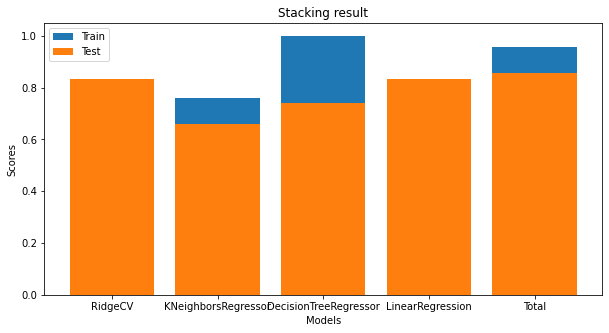

In [70]:
plt.figure(figsize=(10,5))
plt.bar(range(len(score_train)), score_train.values(), align="center", label='Train')
plt.xticks(range(len(score_train)), list(score_train.keys()))
plt.bar(range(len(score_test)), score_test.values(), align="center", label='Test')
plt.xticks(range(len(score_test)), list(score_test.keys()))
plt.autoscale
plt.title('Stacking result')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.legend()

## Вывод: Видим, что стекинг показал самую лучшую метрику качества - 85.6%